In [ ]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# 1.Origen del término e introducción

El término "regresión" en el contexto de las matemáticas y la estadística se origina en el trabajo del y matemático británico Sir Francis Galton a finales del siglo XIX. Su objetivo principal era abordar la pregunta fundamental de si se podía predecir la altura de un niño basándose en las alturas de sus padres. Para abordar esta cuestión, Galton desarrolló un método matemático y, en el proceso, acuñó el término "regresión".

La "regresión" se refiere a la tendencia de las variables a "regresar" hacia la media (mediocridad) o el promedio en lugar de mantenerse en valores extremos. En su estudio, Galton observó que en una población, los hijos de padres muy altos tendían a ser altos, pero no tan altos como sus padres. Lo mismo ocurría con los hijos de padres de baja estatura. En otras palabras, las alturas de los hijos "regresaban" hacia el promedio de la población en lugar de mantener la misma altura extrema que sus padres.

Originalmente, Galton midió la altura de los padres, tanto del padre como de la madre, y de cada uno de sus hijos, además de registrar el género de los hijos. Luego, calculó la altura media de los padres, ajustando la altura de la madre por un factor de 1.08 para compensar las diferencias en altura entre los sexos.

<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSnfAq_x-0mYaSzQS9pyEA-_S0PlJw2neOZVw&usqp=CAU'>

*Nota: Galton fue uno de los primeros defensores de la eugenesia.

# 2.Ejemplo para un dataset "lineal":

Con el objetivo de ejemplificar una regresión lineal simple con datos reales, vamos a trabajar con un subconjunto de datos de viviendas de Boston y utilizaremos las variables rm (número medio de habitaciones) y medv (valor medio de la vivienda).

In [ ]:
# Cargamos el dataset original
df_boston = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')
# Seleccionamos las columnas de interés y el subconjunto
df_boston = df_boston[df_boston.age<70][['rm','medv']]
# Reescalamos la variable para que esté expresada en dólares y facilitar la interpretación de los coeficientes
df_boston['medv'] = df_boston['medv']*1000
# Mostramos la cabecera de los datos
df_boston.head()

,rm,medv
0,6.575,24000.0
2,7.185,34700.0
3,6.998,33400.0
4,7.147,36200.0
5,6.430,28700.0


In [ ]:
# Total de registros
df_boston.shape[0]

219

In [ ]:
# Definir las variables independientes (X) y la variable dependiente (y)
X = df_boston['rm']
y = df_boston['medv']

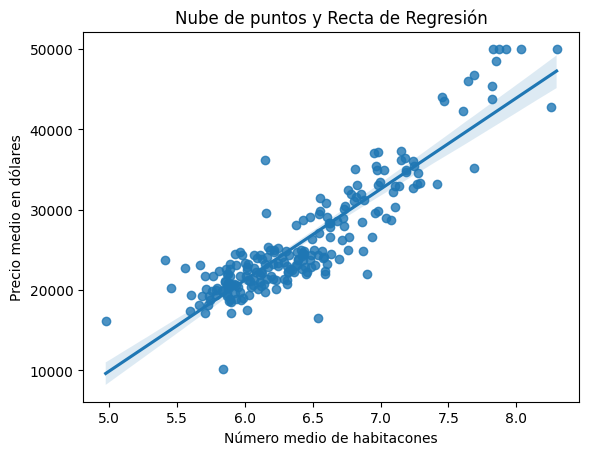

In [ ]:
# Crear la nube de puntos y la recta de regresión
sns.regplot(x="rm", y="medv", data=df_boston)
plt.title("Nube de puntos y Recta de Regresión")
plt.xlabel("Número medio de habitacones")
plt.ylabel("Precio medio en dólares")
plt.show()

In [ ]:
# Crear el modelo de regresión lineal
X = sm.add_constant(X)
model = sm.OLS(y, X)

# Ajustar el modelo a los datos
results = model.fit()

## 2.1 Interpretación del summary: coeficientes, ajuste, diagnóstico...

In [ ]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     888.7
Date:                Thu, 26 Oct 2023   Prob (F-statistic):           1.13e-78
Time:                        14:49:04   Log-Likelihood:                -2082.2
No. Observations:                 219   AIC:                             4168.
Df Residuals:                     217   BIC:                             4175.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.668e+04   2452.121    -19.036      0.0

- Ajuste y significancia:
  - **R-cuadrado (R-squared):** El modelo de regresión explica aproximadamente el 80.4% de la variabilidad en los precios de viviendas mediante el número de habitaciones como predictor. Esta métrica tiene la limitación de aumentar al agregar más variables predictoras, incluso si no son relevantes. Para abordar esta limitación, se utiliza el R² ajustado, que considera la complejidad del modelo y penaliza el sobreajuste. El R² ajustado es especialmente útil al comparar modelos con diferentes cantidades de variables predictoras, ya que proporciona una medida más realista de su calidad.

  - **Prob (F-statistic):** Medida que se utiliza para determinar si el modelo de regresión en su conjunto es significativo. Un valor bajo de sugiere que el modelo es globalmente significativo y que al menos una de las variables predictoras es relevante para explicar la variabilidad en la variable de respuesta. En nuestro caso es 1.13e-78 < 0.05 lo que significa que hay evidencia suficiente para rechazar la hipótesis nula (todos los coeficientes de regresión son iguales a cero) y concluir que al menos una de las variables predictoras tiene un efecto significativo en la variable de respuesta. Es decir, el modelo global es estadísticamente significativo.

  - **AIC y BIC:** Criterio de Información de Akaike y Criterio de Información Bayesiano son medidas de la calidad del ajuste modelo. Un valor más bajo de AIC y BIC indica un mejor ajuste del modelo, útil cuando comparmos distintos modelos (métricas relativas).

- Coeficientes:
  - **Coeficientes (coef):** El coeficiente del intercepto (const) es -4.668e+04 y el coeficiente para el número medio de habitaciones (rm) es 1.132e+04. Cada habitación adicional se asocia, en promedio, a un aumento de 11.320 dólares en el precio de la vivienda.

  - **Significancia de los ceoficientes (t y P>|t|):** El valor t mide cuántas desviaciones estándar el coeficiente está respecto al cero. En este caso, los coeficientes son significativos, ya que los valores t son altos en valor absoluto (19.036 y 29.811) y además los p-valores en la columna "P>|t|" es prácticamente cero (p-valor < 0.05 = Rechaza la H0 de igualdad de los coeficientes a 0).

  - **Confianza de los coeficientes**: Si el intervalo de confianza del 95% no incluye el valor cero, esto sugiere que el coeficiente es estadísticamente significativo por lo que se puede afirmar con un 95% de confianza que el coeficiente es diferente de cero y tiene un efecto significativo en la variable de respuesta. Si el intervalo de confianza incluye el valor cero, esto sugiere que el coeficiente no es estadísticamente significativo.

- Residuos:

  - **Normalidad de los residuos:** Prob(Omnibus) y Prob(JB) son pruebas estadísticas donde H0: Residuos del modelo siguen una distribución normal. En este caso ambos p-valores son menores a 0.05 lo cual es indicio de que los residuos no siguen una distribución normal (rechazamos la hipótesis nula planteada).

  - **Sesgo (Skew):** El sesgo es una medida de la asimetría de la distribución de los residuos. Un valor de 0.296 sugiere una ligera asimetría positiva en la distribución de los residuos, lo que significa que la cola derecha de la distribución es un poco más larga que la cola izquierda.

  - **Kurtosis:** La kurtosis es una medida de la forma de la distribución de los residuos. Un valor de 4.460 sugiere que la distribución de los residuos es más puntiaguda (leptocúrtica) que una distribución normal, lo que indica una concentración de valores alrededor de la media y una mayor probabilidad de valores extremos.

  - **Durbin-Watson:** El valor de Durbin-Watson es una estadística que indica si los residuos son aleatorios o presentan autocorrelación. Si tiene un valor entre 1.5 y 2.5, se asume independencia; en nuestro caso un valor de 0.925 indica la presencia de cierta autocorrelación positiva en los residuos.

## 2.2.Assumptions

Un modelo de regresión lineal se basa en varias suposiciones fundamentales que deben cumplirse para que las inferencias y predicciones basadas en el modelo sean válidas y confiables. Estas suposiciones incluyen:

- **Linealidad:** Se asume que existe una relación lineal entre las variables.

- **Independencia de las variables predictoras:** Se asume que las variables predictoras son independientes entre sí y no presentan una alta correlación (multicolinealidad).

- **Ausencia de valores atípicos:** Los valores atípicos en los datos pueden tener un impacto significativo en la calidad del modelo. Es importante identificar y tratar los valores atípicos de manera adecuada.

- **Independencia de errores:** Estos deben ser aleatorios.

- **Normalidad de los errores:** Los errores o residuos deben seguir una distribución normal. Esto es importante para realizar inferencias válidas, como intervalos de confianza y pruebas de hipótesis.

- **Homocedasticidad:** La varianza de los residuos debe ser constante en todos los niveles de las variables predictoras. Es decir, la varianza de los residuos no aumenta ni disminuye a medida que cambian los valores de X. La heterocedasticidad (donde la varianza de los residuos cambia con las variables predictoras) puede afectar la precisión de las estimaciones y las pruebas de hipótesis.

Echemos un vistazo a como se comportan los residuos de nuestro modelo lineal:

In [ ]:
# Accedemos a los residuos del modelo
residuos = results.resid

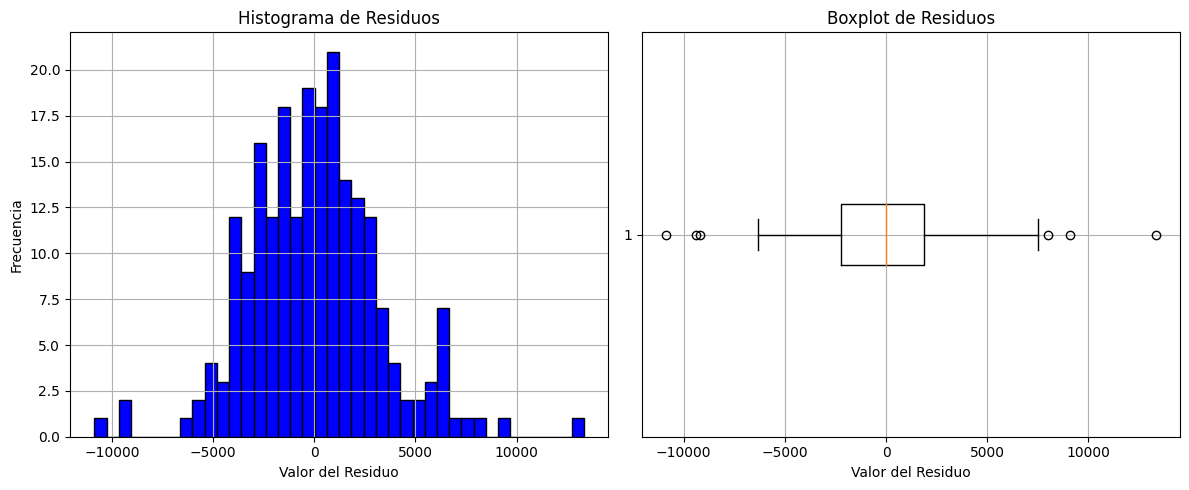

In [ ]:
# Crea una figura con dos subgráficos (uno para el histograma y otro para el boxplot)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Histograma de los residuos en el primer subgráfico (ax1)
ax1.hist(residuos, bins=40, color='blue', edgecolor='black')
ax1.set_title('Histograma de Residuos')
ax1.set_xlabel('Valor del Residuo')
ax1.set_ylabel('Frecuencia')
ax1.grid(True)

# Boxplot de los residuos en el segundo subgráfico (ax2)
ax2.boxplot(residuos, vert=False)
ax2.set_title('Boxplot de Residuos')
ax2.set_xlabel('Valor del Residuo')
ax2.grid(True)

# Muestra la figura con ambos gráficos
plt.tight_layout()  # Ajusta los márgenes para evitar superposiciones
plt.show()

In [ ]:
print(f'Valor medio de los residuos: {residuos.mean()}')

Valor medio de los residuos: -3.1163690603214854e-11


In [ ]:
_, p_value = stats.shapiro(residuos)
p_value

0.003778686048462987

Podemos observar que la distribución de los residuos se asemeja a una distribución normal y que la media es prácticamente 0, aún así hay presencia de valores atípicos (lo cual sugiere observaciones inusuales). El test de normalidad de Shapiro-Wilk nos sugiere que los residuos no siguen una distribución normal (se rechaza la hipótesis nula, 0.003 < 0.05).

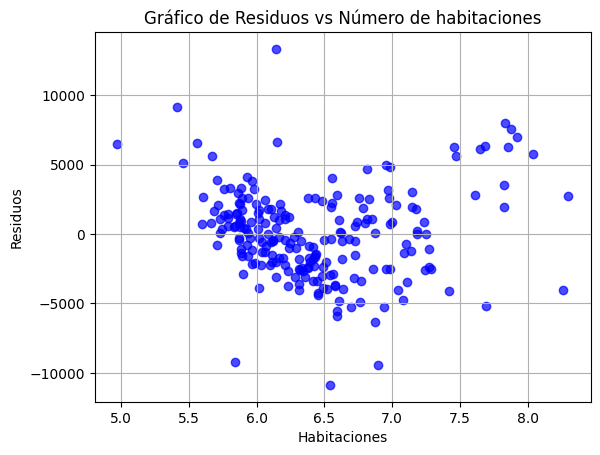

In [ ]:
# Crea el gráfico de residuos versus valores ajustados
plt.scatter(X['rm'], residuos, c='blue', alpha=0.7)
plt.title('Gráfico de Residuos vs Número de habitaciones')
plt.xlabel('Habitaciones')
plt.ylabel('Residuos')
plt.grid(True)
plt.show()

Un gráfico ideal mostraría residuos distribuidos aleatoriamente alrededor del cero, sin patrones discernibles. Ver patrones lineales o no lineales en el gráfico podría indicar que el modelo de regresión no está capturando adecuadamente la relación entre las variables.

 pruebas de homocedasticidad, como la prueba de Breusch-Pagan.
 qqplot

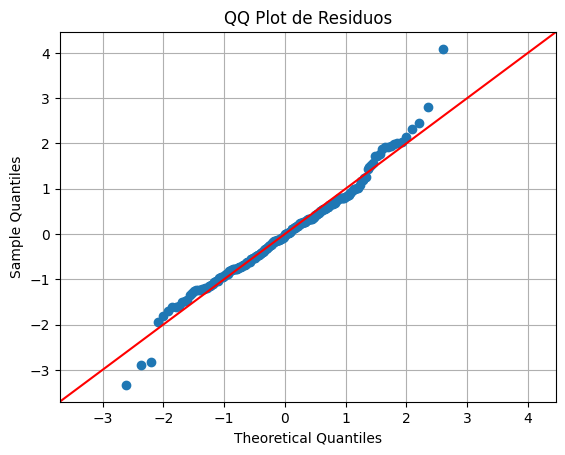

In [ ]:
# Crea un QQ plot de los residuos
fig = sm.qqplot(residuos, line='45', fit=True)
plt.title('QQ Plot de Residuos')
plt.grid(True)
plt.show()

El propósito principal de los puntos azules en el QQ plot es comparar los cuantiles de la muestra de datos con los cuantiles esperados si los datos siguen una distribución normal estándar. En otras palabras, se trata de una comparación entre los valores observados (residuos) y los valores esperados bajo la asunción de una distribución específica.

Si los puntos azules en el QQ plot siguen aproximadamente una línea diagonal o la línea de referencia (generalmente una línea de 45 grados), esto indica que los cuantiles de la muestra de datos se asemejan a los cuantiles esperados bajo la distribución teórica.

# 3.Otros aspectos:

- Cálculo de los coeficientes:

  El cálculo de los coeficientes en un modelo de regresión lineal puede realizarse tanto analíticamente como con el descenso del gradiente. El OLS proporciona una solución directa, mientras que el descenso del gradiente es útil en situaciones más complejas o en modelos que involucran regresiones no lineales o regularización.

  - **Cálculo Analítico (Mínimos Cuadrados Ordinarios OLS):** Utiliza fórmulas matemáticas para encontrar los valores de los coeficientes que minimizan la suma de los cuadrados de los residuos. Este enfoque se basa en las ecuaciones normales y proporciona soluciones analíticas directas para los coeficientes.

  - **Descenso del Gradiente:** El descenso del gradiente es una técnica de optimización que se utiliza para encontrar los coeficientes de regresión al minimizar una función de costo. El descenso del gradiente comienza con valores iniciales para los coeficientes y ajusta iterativamente los coeficientes para minimizar la función de costo.

- Interacciones entre las variables:

  Cuando usamos "X1 * X2" en un modelo, significa que el efecto de una variable (X1) en otra (Y) no es fijo, sino que depende de otra variable (X2). Si tomamos como ejemplo tiempo de estudio (X1), ansiedad (X2), y rendimiento académico (Y), "X1 * X2" nos ayuda a entender cómo el tiempo de estudio influye en el rendimiento, teniendo en cuenta si el estudiante está ansioso o no. La notación "X1 + X2 + X1*X2" nos permite analizar el efecto individual de cada variable y cómo interactúan entre sí.

- Regresión logística:

  Modelo de clasificación utilizado para predecir la probabilidad de que un evento binario ocurra en función de variables predictoras. El modelo se basa en la función logística y mapea la salida a una probabilidad entre 0 y 1, lo que lo hace adecuado para problemas de toma de decisiones binarias, como diagnósticos médicos o detección de spam.

- Regresión polinómica:

  Modelo de regresión que se utiliza cuando la relación entre las variables predictoras y la variable dependiente no es lineal, lo que significa que los datos siguen un patrón curvilíneo. Este enfoque permite ajustar una función polinómica (cuadrática o cúbica) a los datos para capturar relaciones complejas. Ejemplo: Y = aX^3 + bX^2 + cX + d

  Lecturas recomendadas:

  https://online.stat.psu.edu/stat462/node/79/
  
  https://www.youtube.com/watch?v=k964_uNn3l0


# Extra: Ejemplo de Galton

Para nuestros propósitos en este ejercicio de regresión lineal simple, trabajaremos con una versión resumida del conjunto de datos, que se enfoca en la altura media de los padres y la altura de cada hijo. Nuestra tarea será encontrar una relación matemática lineal entre estas dos variables, donde un cambio constante en una variable se asocia con un cambio constante en la otra.

In [ ]:
# Cargamos el dataset de Galton
df = pd.read_csv('https://raw.githubusercontent.com/data-8/materials-fa17/master/lec/galton.csv')[['midparentHeight','childHeight']]
df.head()

,midparentHeight,childHeight
0,75.43,73.2
1,75.43,69.2
2,75.43,69.0
3,75.43,69.0
4,73.66,73.5


In [ ]:
# Conversión de pulgadas a centímetros
df = df*2.54
df.head()

,midparentHeight,childHeight
0,191.5922,185.928
1,191.5922,175.768
2,191.5922,175.260
3,191.5922,175.260
4,187.0964,186.690


In [ ]:
# Total de registros
df.shape

(934, 2)

In [ ]:
# Definir las variables independientes (X) y la variable dependiente (y)
X = df['midparentHeight']
X = sm.add_constant(X)
y = df['childHeight']

# Crear el modelo de regresión lineal
model = sm.OLS(y, X)

# Ajustar el modelo a los datos
results = model.fit()

In [ ]:
# Coeficientes de regresión
results.params

const              57.496051
midparentHeight     0.637361
dtype: float64

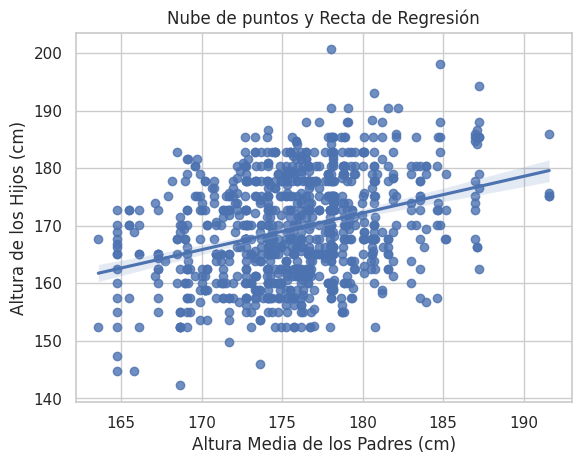

In [ ]:
# Crear la nube de puntos y la recta de regresión
sns.regplot(x="midparentHeight", y="childHeight", data=df)
plt.title("Nube de puntos y Recta de Regresión")
plt.xlabel("Altura Media de los Padres (cm)")
plt.ylabel("Altura de los Hijos (cm)")
plt.show()

In [ ]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            childHeight   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     107.0
Date:                Thu, 26 Oct 2023   Prob (F-statistic):           8.05e-24
Time:                        00:23:34   Log-Likelihood:                -3335.7
No. Observations:                 934   AIC:                             6675.
Df Residuals:                     932   BIC:                             6685.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              57.4961     10.833     